# **Pengembangan Aplikasi Prediksi Output Daya pada Pembangkit Listrik Siklus Gabungan (CCPP) Berdasarkan Faktor Lingkungan Menggunakan Algoritma Gradient Boosting Regression Berbasis Machine Learning**

## 📌 Business Understanding

### Judul Proyek:
**Pengembangan Aplikasi Prediksi Output Daya pada Pembangkit Listrik Siklus Gabungan (CCPP) Berdasarkan Faktor Lingkungan Menggunakan Algoritma Gradient Boosting Regression**

---

### 💼 Latar Belakang Bisnis

Pembangkit Listrik Siklus Gabungan (Combined Cycle Power Plant / CCPP) merupakan sistem pembangkitan energi yang menggabungkan turbin gas dan turbin uap untuk meningkatkan efisiensi produksi daya listrik. Efisiensi output daya pada CCPP sangat dipengaruhi oleh kondisi lingkungan seperti:
Variabel pada Dataset:
Fitur (Input):
- Temperature (T) — suhu ambient rata-rata per jam (°C)
- Ambient Pressure (AP) — tekanan atmosfer ambient rata-rata per jam (hPa)
- Relative Humidity (RH) — kelembaban relatif rata-rata per jam (%)
- Exhaust Vacuum (V) — vakum buangan dari turbin uap (mmHg)
Target (Output):
- Electrical Energy Output (EP) — energi listrik bersih yang dihasilkan per jam (MW)

Perubahan kecil pada faktor-faktor ini dapat berdampak signifikan pada performa daya listrik yang dihasilkan. Oleh karena itu, diperlukan suatu sistem cerdas yang mampu memprediksi daya output secara akurat berdasarkan data lingkungan aktual.

---

### 🎯 Tujuan Bisnis

- Mengembangkan sistem prediksi daya listrik berbasis Machine Learning dengan algoritma Gradient Boosting Regression.
- Memberikan estimasi output daya secara real-time berdasarkan input kondisi lingkungan.
- Membantu operator dalam pengambilan keputusan dan perencanaan beban operasional.
- Meningkatkan efisiensi dan keandalan operasional pembangkit listrik.

---

### ⚙️ Permasalahan Bisnis

- Operator masih mengandalkan estimasi manual atau rumus baku yang tidak adaptif terhadap dinamika lingkungan.
- Tidak tersedia sistem berbasis data yang dapat memberikan prediksi instan dan akurat terhadap output daya.
- Kurangnya dukungan alat bantu digital yang mudah digunakan oleh operator lapangan.

---

### 📈 Manfaat dan Keuntungan Bisnis

- Meningkatkan efisiensi operasional dan pengaturan distribusi daya.
- Mengurangi risiko pemborosan energi dan biaya akibat over/under load.
- Mendukung transformasi digital pembangkit listrik berbasis teknologi data dan kecerdasan buatan.
- Menyediakan sistem yang dapat diakses secara praktis melalui antarmuka berbasis aplikasi (Streamlit).

---

# IMPORT LIBRARY

In [55]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import shap

import warnings
warnings.filterwarnings("ignore")

# DATA LOAD

In [56]:
from google.colab import files
uploaded = files.upload()

Saving Folds5x2_pp.xlsx to Folds5x2_pp.xlsx


In [57]:
data = pd.read_excel("Folds5x2_pp.xlsx")  # dataset from UCI CCPP
print(data.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [59]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [60]:
data.isnull().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


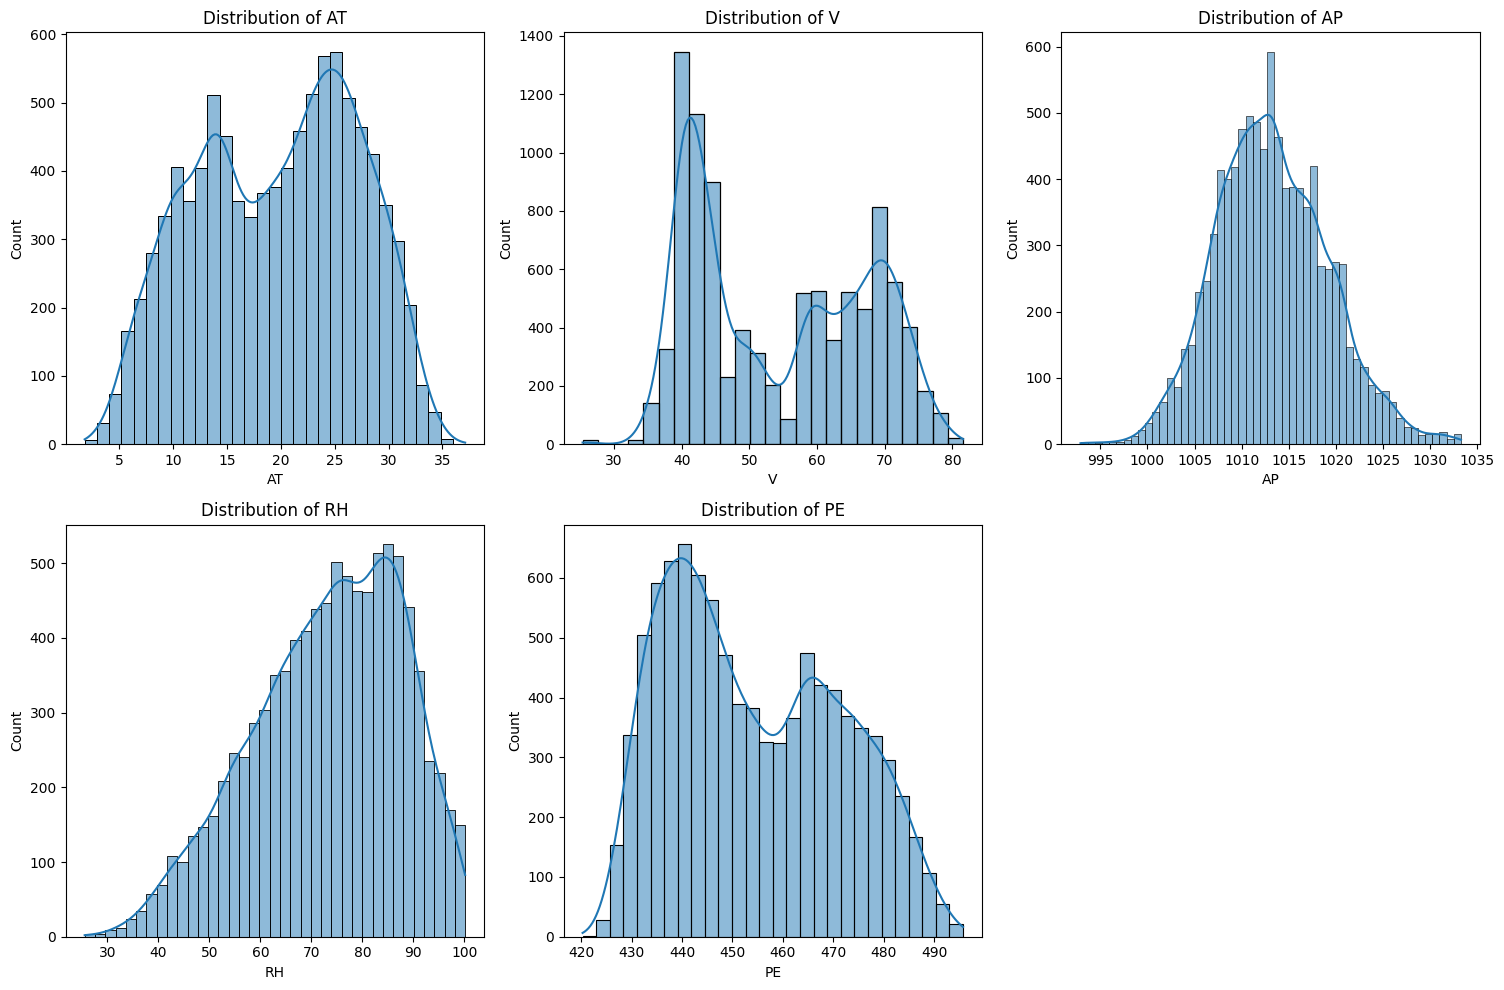

In [61]:
# Jumlah fitur
n_features = len(data.columns)

# Membuat subplot untuk distribusi (histogram)
n_cols = 3
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Rata-rata banyaknya kolom dan baris yang lebih fleksibel untuk menyesuaikan fitur yang ada
for i, column in enumerate(data.columns):
    ax = axes[i // n_cols, i % n_cols]  # Menentukan posisi grid
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')

# Hapus axis yang tidak digunakan
for i in range(n_features, n_cols * n_rows):
    fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()


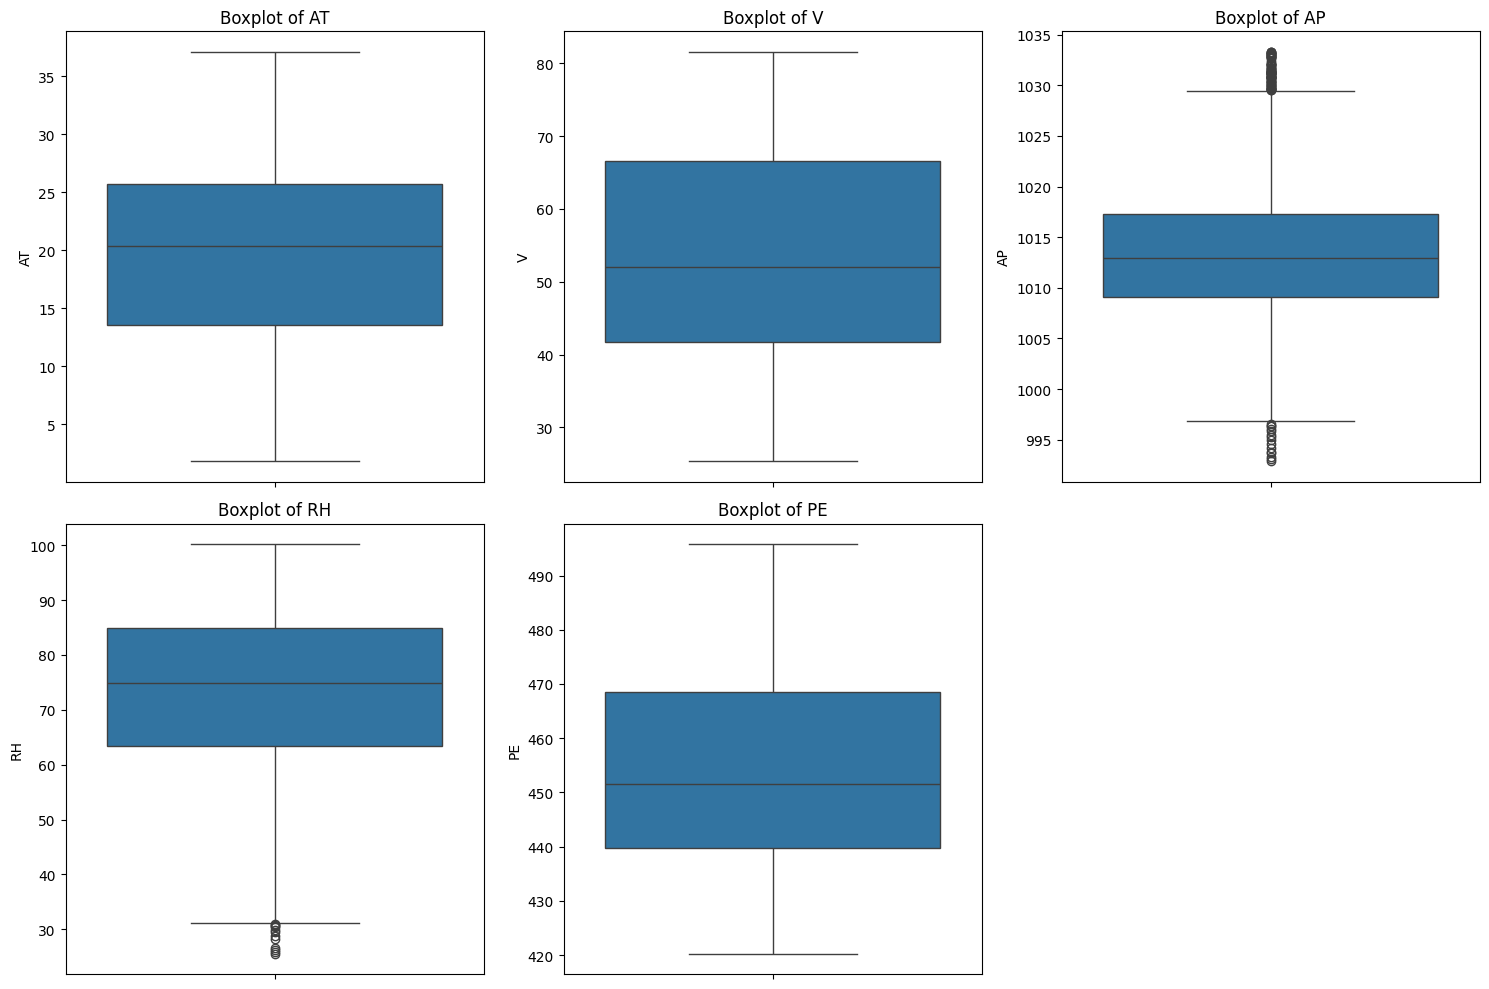

In [62]:
# Membuat subplot untuk boxplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Menyusun boxplot di grid
for i, column in enumerate(data.columns):
    ax = axes[i // n_cols, i % n_cols]  # Menentukan posisi grid
    sns.boxplot(data[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')

# Hapus axis yang tidak digunakan
for i in range(n_features, n_cols * n_rows):
    fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

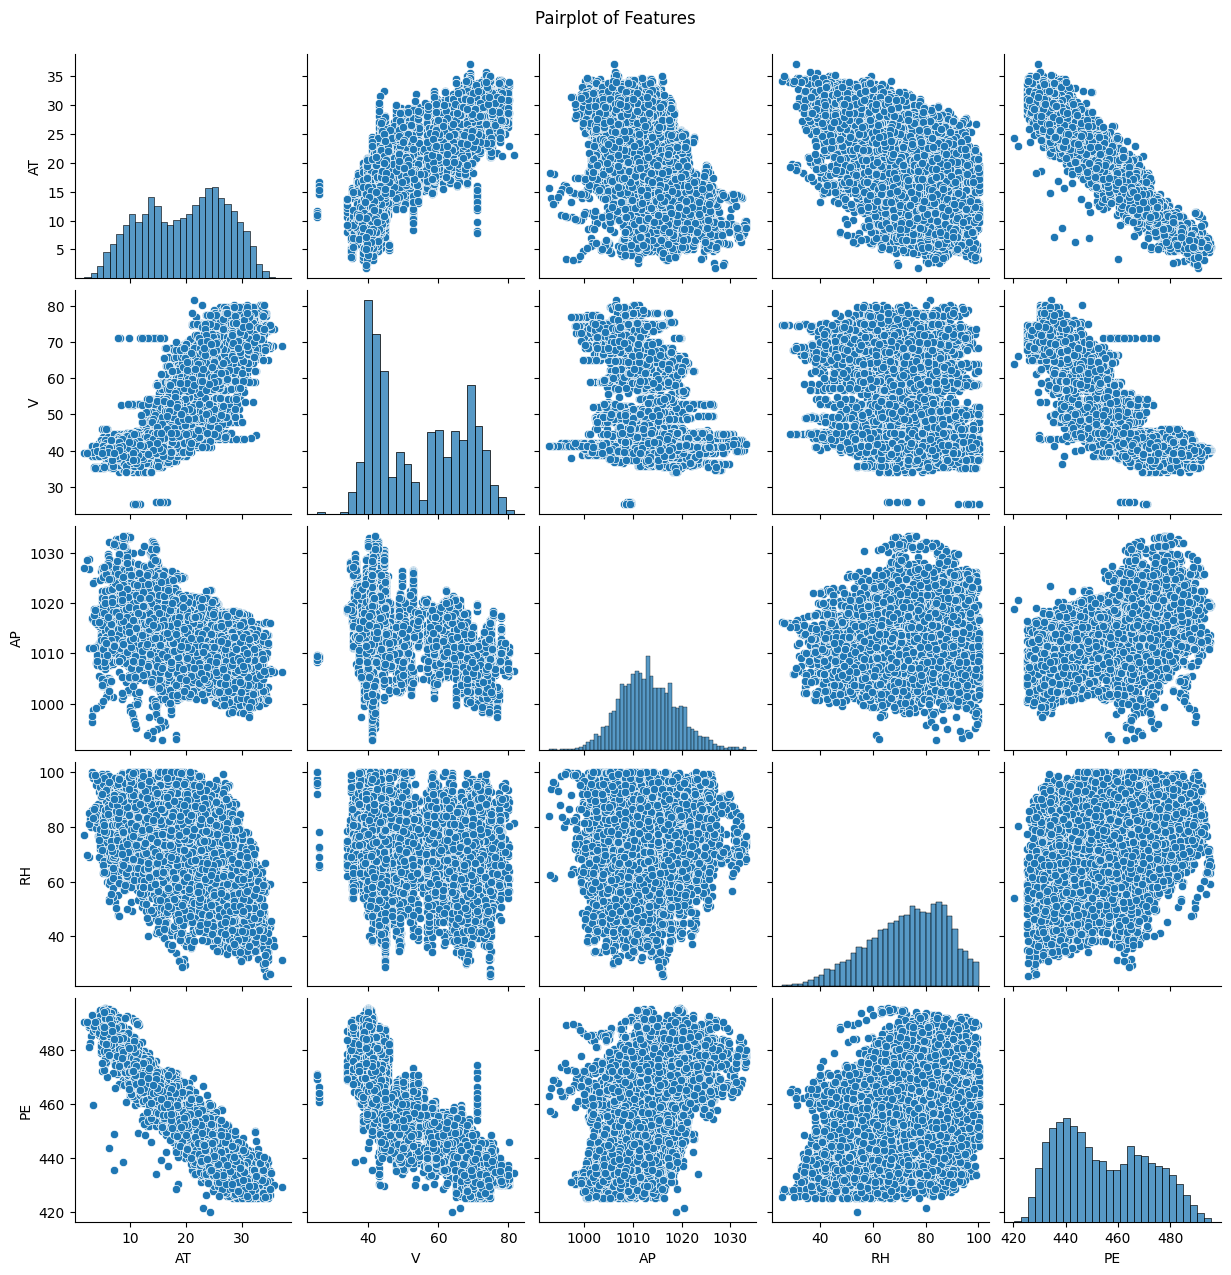

In [63]:
# Pairplot untuk melihat hubungan antar fitur
plt.figure(figsize=(10, 8))
sns.pairplot(data)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

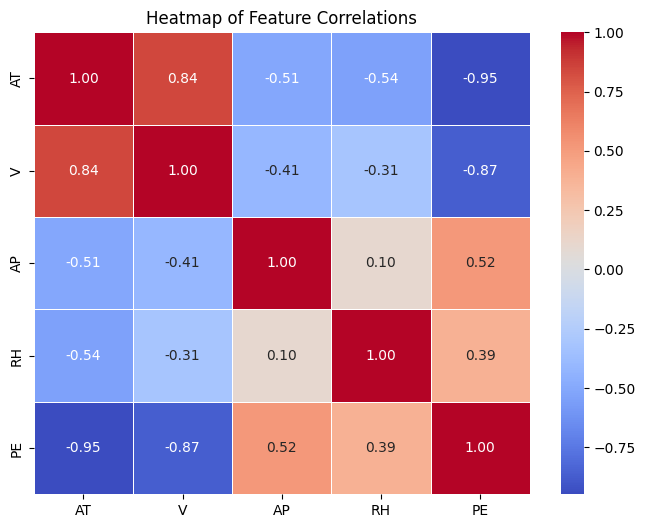

In [64]:
# Heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

# DATA PREPOCESSING

In [65]:
# Menampilkan jumlah duplikat
duplikat = data.duplicated()
print("Jumlah duplikat:", duplikat.sum())

# Menampilkan semua baris yang duplikat (termasuk baris pertama yang dianggap original)
data[duplikat | data.duplicated(keep=False)]

Jumlah duplikat: 41


,AT,V,AP,RH,PE
231,26.85,75.60,1017.43,74.55,433.48
345,12.19,41.17,1019.43,65.47,475.64
352,25.56,75.60,1017.37,69.31,442.20
468,25.21,75.60,1017.19,69.84,445.84
726,28.41,75.60,1018.48,56.07,440.28
...,...,...,...,...,...
9147,7.64,41.17,1020.01,75.14,488.53
9201,29.51,75.60,1017.92,50.61,431.18
9345,8.57,41.17,1020.18,72.47,484.20
9350,12.27,41.17,1019.41,58.10,475.13


In [66]:
# Menghapus duplikat
data = data.drop_duplicates()

# Cek lagi jumlah duplikat setelah dihapus
jumlah_duplikat = data.duplicated().sum()
print(f"Jumlah duplikat setelah dihapus: {jumlah_duplikat}")

Jumlah duplikat setelah dihapus: 0


In [67]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Langkah 1: Menghapus outlier hanya pada kolom 'AP' menggunakan metode IQR
def remove_outliers_iqr_column(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Filter data berdasarkan IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Langkah 2: Deteksi outlier menggunakan Z-Score untuk semua kolom numerik
def zscore_outliers(data, threshold=3):
    outliers = pd.DataFrame()
    for col in data.select_dtypes(include=[np.number]).columns:
        z_scores = zscore(data[col])
        outliers[col] = (np.abs(z_scores) > threshold).astype(int)
    return outliers

# Langkah 3: Deteksi outlier menggunakan IQR untuk semua kolom numerik
def iqr_outliers(data):
    outliers = pd.DataFrame()
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).astype(int)
    return outliers

# Contoh penggunaan
# Data awal (asumsikan 'data' sudah terdefinisi)
data = remove_outliers_iqr_column(data, 'AP')  # Hapus baris outlier berdasarkan kolom 'AP'

# Deteksi outlier untuk semua kolom numerik
zscore_result = zscore_outliers(data)
iqr_result = iqr_outliers(data)

# Tampilkan ringkasan jumlah outlier per kolom
print("🔎 Outlier Berdasarkan Z-score:")
print(zscore_result.sum())

print("\n🔎 Outlier Berdasarkan IQR:")
print(iqr_result.sum())

🔎 Outlier Berdasarkan Z-score:
AT    0
V     0
AP    0
RH    6
PE    0
dtype: int64

🔎 Outlier Berdasarkan IQR:
AT     0
V      0
AP     7
RH    11
PE     0
dtype: int64


In [68]:
# Sekarang buat X dan y
X = data[['AT','V','AP','RH']]
y = data['PE']

In [69]:
# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the dataset into training and testing sets
# 'test_size=0.2' means 20% of the data is allocated for testing, and 80% for training
# 'random_state=42' ensures reproducibility by fixing the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)  # Number of training samples and features
print("X_test shape:", X_test.shape)    # Number of testing samples and features
print("y_train shape:", y_train.shape)  # Number of training labels
print("y_test shape:", y_test.shape)    # Number of testing labels

X_train shape: (7548, 4)
X_test shape: (1888, 4)
y_train shape: (7548,)
y_test shape: (1888,)


# MODELING

=== Gradient Boosting Evaluation ===
MAE : 2.0750158397320226
MSE : 9.289811937426398
RMSE: 3.0479192800050328
R2  : 0.9686832969935059

=== Cross-Validation (5-Fold) ===
CV MAE: 2.132299320940363 ± 0.044030510694350856

=== Feature Importance - Gradient Boosting ===
AT    0.908450
V     0.059324
AP    0.018317
RH    0.013910
dtype: float64


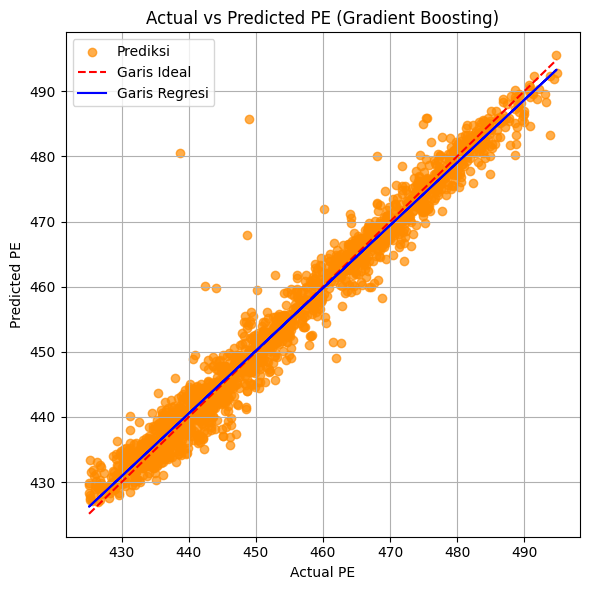

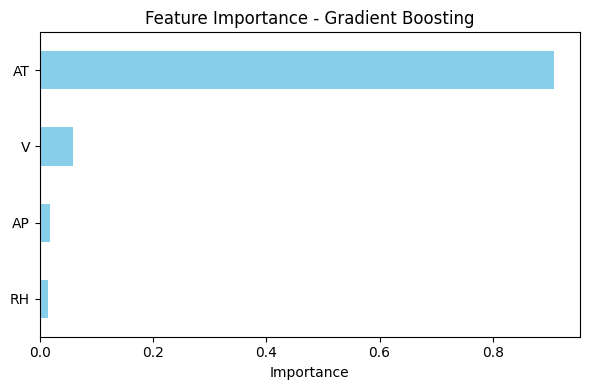

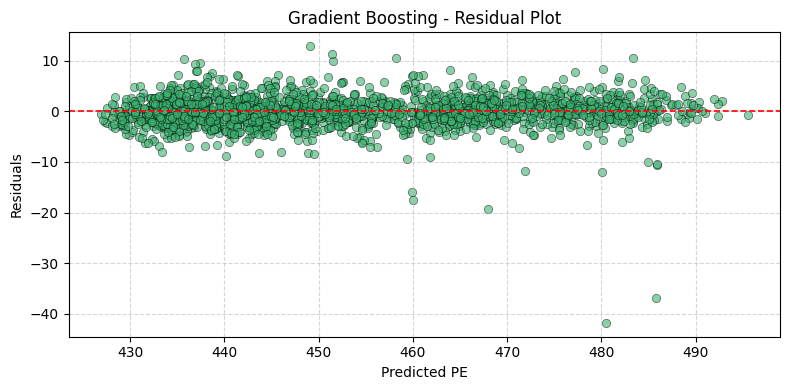

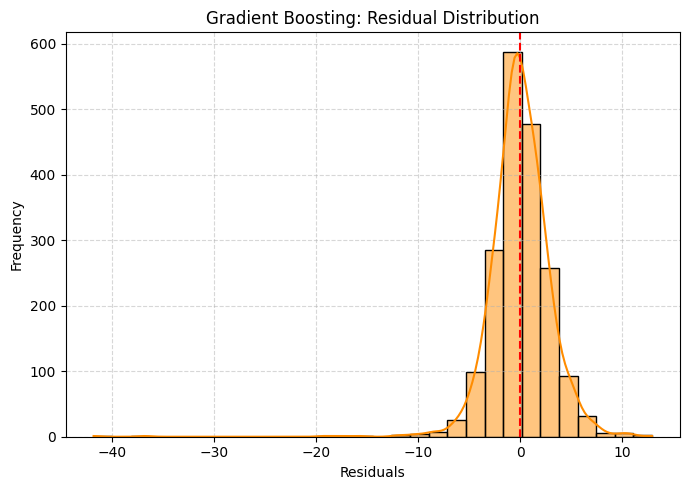

In [70]:
# === 1. Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import sqrt

# === 2. Inisialisasi Model dengan Best Hyperparameters ===
gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    n_estimators=300,
    random_state=42
)

# === 3. Latih Model ===
gb_model.fit(X_train, y_train)

# === 4. Prediksi ===
y_pred_gb = gb_model.predict(X_test)

# === 5. Evaluasi di Test Set ===
print("=== Gradient Boosting Evaluation ===")
print("MAE :", mean_absolute_error(y_test, y_pred_gb))
print("MSE :", mean_squared_error(y_test, y_pred_gb))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R2  :", r2_score(y_test, y_pred_gb))

# === 6. Cross-Validation (5-Fold) ===
gb_cv_scores = -cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("\n=== Cross-Validation (5-Fold) ===")
print("CV MAE:", gb_cv_scores.mean(), "±", gb_cv_scores.std())

# === 7. Feature Importance ===
gb_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
print("\n=== Feature Importance - Gradient Boosting ===")
print(gb_importance.sort_values(ascending=False))

# === 8. Plot: Prediksi vs Aktual dengan Garis Regresi ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color='darkorange', label='Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Garis Ideal')
coef = np.polyfit(y_test, y_pred_gb, 1)
reg_line = np.poly1d(coef)
plt.plot(y_test, reg_line(y_test), color='blue', linestyle='-', label='Garis Regresi')
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")
plt.title("Actual vs Predicted PE (Gradient Boosting)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. Plot: Feature Importance ===
plt.figure(figsize=(6, 4))
gb_importance.sort_values().plot(kind='barh', color='skyblue', title='Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# === 10. Hitung Residual ===
residuals_gb = y_test - y_pred_gb

# === 11. Plot Residual Scatter ===
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=y_pred_gb,
    y=residuals_gb,
    color='mediumseagreen',
    edgecolor='black',
    alpha=0.6
)
plt.axhline(0, color='red', linestyle='--', linewidth=1.2)
plt.xlabel('Predicted PE')
plt.ylabel('Residuals')
plt.title('Gradient Boosting - Residual Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === 12. Distribusi Residual ===
def plot_residuals(y_true, y_pred, title='Residual Plot'):
    residuals = y_true - y_pred
    plt.figure(figsize=(7, 5))
    sns.histplot(residuals, bins=30, kde=True, color='darkorange')
    plt.axvline(0, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_pred_gb, title='Gradient Boosting: Residual Distribution')

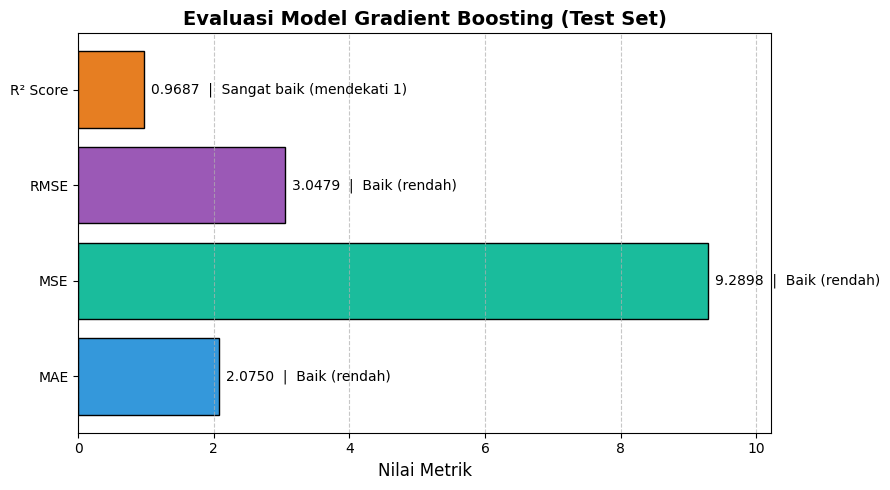

In [71]:
import matplotlib.pyplot as plt

# === 10a. Visualisasi Evaluasi Test Set dengan Penjelasan Kualitas ===
eval_test = {
    'MAE': 2.0750,
    'MSE': 9.2898,
    'RMSE': 3.0479,
    'R² Score': 0.9687
}

penilaian = {
    'MAE': 'Baik (rendah)',
    'MSE': 'Baik (rendah)',
    'RMSE': 'Baik (rendah)',
    'R² Score': 'Sangat baik (mendekati 1)'
}

colors_test = ['#3498db', '#1abc9c', '#9b59b6', '#e67e22']

plt.figure(figsize=(9, 5))
bars = plt.barh(list(eval_test.keys()), list(eval_test.values()),
                color=colors_test, edgecolor='black')

# Tambahkan label angka dan penilaian di ujung bar
for bar, (metric, value) in zip(bars, eval_test.items()):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{value:.4f}  |  {penilaian[metric]}',
             va='center', fontsize=10, color='black')

# Labeling dan pengaturan plot
plt.title("Evaluasi Model Gradient Boosting (Test Set)", fontsize=14, fontweight='bold')
plt.xlabel("Nilai Metrik", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, max(eval_test.values()) * 1.1)  # beri sedikit ruang agar label tidak mepet
plt.tight_layout()
plt.show()

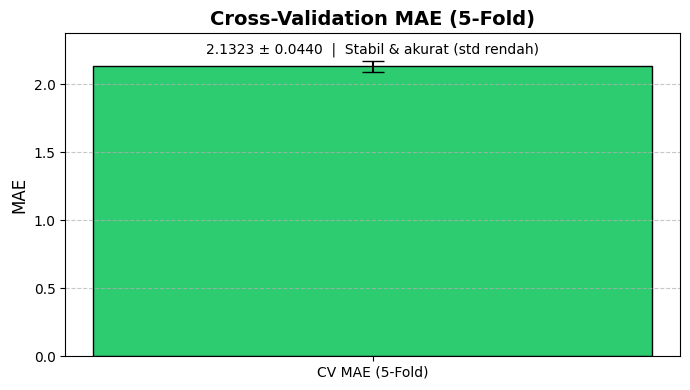

In [75]:
import matplotlib.pyplot as plt

# === 10b. Visualisasi Cross-Validation MAE (5-Fold) ===
cv_mae = 2.1323
cv_std = 0.0440

# Penilaian hasil cross-validation
penilaian_cv = "Stabil & akurat (std rendah)"

plt.figure(figsize=(7, 4))
bar = plt.bar(['CV MAE (5-Fold)'], [cv_mae], yerr=[cv_std],
              capsize=8, color='#2ecc71', edgecolor='black',
              error_kw=dict(lw=1.5))

# Tambahkan label angka dan penilaian di atas bar
plt.text(0, cv_mae + cv_std + 0.05,
         f'{cv_mae:.4f} ± {cv_std:.4f}  |  {penilaian_cv}',
         ha='center', fontsize=10, color='black')

# Labeling dan pengaturan plot
plt.title("Cross-Validation MAE (5-Fold)", fontsize=14, fontweight='bold')
plt.ylabel("MAE", fontsize=12)
plt.ylim(0, cv_mae + cv_std + 0.2)  # beri ruang atas agar label tidak mepet
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ExactExplainer explainer: 9437it [02:54, 52.07it/s]                          


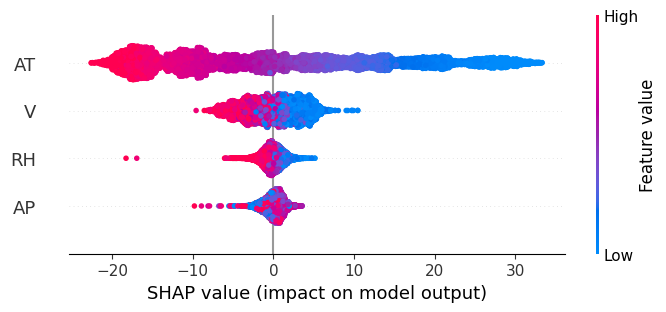

In [73]:
import shap
# Buat SHAP explainer menggunakan prediksi model Gradient Boosting
explainer = shap.Explainer(gb_model.predict, X)  # X sebagai background dataset
shap_values = explainer(X)  # Hitung SHAP values untuk dataset X

# Plot SHAP summary (beeswarm plot)
shap.plots.beeswarm(shap_values)

In [74]:
import joblib
# Simpan model Gradient Boosting terbaik
joblib.dump(gb_model, "model_gradient_boosting.pkl")

# Jika menggunakan scaler di preprocessing, ekspor juga scaler
# Contoh, jika scaler didefinisikan dan fit sebelumnya:
# joblib.dump(scaler, "scaler.pkl")

# Jika tidak ada scaler, jangan ekspor scaler untuk menghindari error NameError

['model_gradient_boosting.pkl']